###### British Airways Virtual Internship

# Data preparation

Now that we have raw data scraped from the website, we have to prepare the dataset for analysis. 

In [227]:
import pandas as pd
import numpy as np

In [228]:
# load data
reviews_df = pd.read_csv('data/reviews_raw.csv', )

In [229]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3589 non-null   object 
 1   country                 3587 non-null   object 
 2   time                    3589 non-null   object 
 3   verified_trip           2064 non-null   object 
 4   review_text             3589 non-null   object 
 5   type_of_traveller       2819 non-null   object 
 6   cabin_flown             3587 non-null   object 
 7   route                   2814 non-null   object 
 8   date_flown              2811 non-null   object 
 9   seat_comfort            3483 non-null   float64
 10  cabin_staff_service     3473 non-null   float64
 11  food_and_beverages      3231 non-null   float64
 12  ground_service          2748 non-null   float64
 13  value_for_money         3589 non-null   int64  
 14  inflight_entertainment  2508 non-null   

In [230]:
reviews_df.head(5)

,title,country,time,verified_trip,review_text,type_of_traveller,cabin_flown,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity,recommended,review_score
0,"""Luggage are still in Glasgow""",United States,30th June 2023,Trip Verified,Came from Glasgow to London and took connectin...,Family Leisure,Economy Class,Glasgow to London,June 2023,1.0,1.0,NaN,1.0,1,NaN,NaN,no,1
1,"""whole experience was terrible""",United Arab Emirates,29th June 2023,Trip Verified,My flight on on 12 May 2023 got delayed an hou...,Solo Leisure,Economy Class,Dubai to Keflavik via London,May 2023,1.0,1.0,NaN,1.0,1,NaN,NaN,no,1
2,"""preferred to fly on easyJet""",United Kingdom,29th June 2023,Not Verified,Cairo is a 5 hour flight and BA considers it t...,Couple Leisure,Economy Class,Cairo to London,June 2023,1.0,1.0,1.0,2.0,1,1.0,1.0,no,2
3,"""stated it is not their fault""",United Kingdom,27th June 2023,Trip Verified,After travelling London to Madrid with British...,Solo Leisure,Economy Class,London to Madrid,May 2023,3.0,3.0,3.0,1.0,1,NaN,NaN,no,1
4,"""luggage was mis-tagged in Dallas""",United States,27th June 2023,Trip Verified,My luggage was mis-tagged in Dallas on my way ...,Family Leisure,Economy Class,London to Cairo,June 2023,1.0,1.0,NaN,1.0,1,NaN,NaN,no,1


In [231]:
reviews_df.shape

(3589, 18)

## Missing values

In [232]:
reviews_df.review_score = reviews_df.review_score.apply(lambda x: x.strip()).replace('na', np.nan)

In [233]:
reviews_df.isna().sum()

title                        0
country                      2
time                         0
verified_trip             1525
review_text                  0
type_of_traveller          770
cabin_flown                  2
route                      775
date_flown                 778
seat_comfort               106
cabin_staff_service        116
food_and_beverages         358
ground_service             841
value_for_money              0
inflight_entertainment    1081
wifi_and_connectivity     3017
recommended                  0
review_score                 5
dtype: int64

## Data type

In [234]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3589 non-null   object 
 1   country                 3587 non-null   object 
 2   time                    3589 non-null   object 
 3   verified_trip           2064 non-null   object 
 4   review_text             3589 non-null   object 
 5   type_of_traveller       2819 non-null   object 
 6   cabin_flown             3587 non-null   object 
 7   route                   2814 non-null   object 
 8   date_flown              2811 non-null   object 
 9   seat_comfort            3483 non-null   float64
 10  cabin_staff_service     3473 non-null   float64
 11  food_and_beverages      3231 non-null   float64
 12  ground_service          2748 non-null   float64
 13  value_for_money         3589 non-null   int64  
 14  inflight_entertainment  2508 non-null   

In [235]:
reviews_df.value_for_money = reviews_df.value_for_money.astype(np.float16)

In [236]:
reviews_df.review_score = pd.to_numeric(reviews_df.review_score)

In [237]:
# memory optimization
for column in reviews_df.select_dtypes(include='float').columns:
    reviews_df[column] = reviews_df[column].astype(np.float16)
reviews_df.review_score = reviews_df.review_score.astype(np.float16)

## Format dates

In [238]:
from datetime import datetime as dt

In [239]:
# removing suffixes on dates to convert to datetime
# also correcting incomplete name of the month found ('Augu')
reviews_df['time'] = reviews_df.time.apply(lambda x: x.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '').replace('Augu ', 'August '))

In [240]:
reviews_df['time'] = pd.to_datetime(reviews_df.time, format="%d %B %Y")
reviews_df['date_flown'] = pd.to_datetime(reviews_df.date_flown, format='%B %Y')

## Route

In [241]:
import re

### Origin

In [242]:
reviews_df['route_from'] = reviews_df.route.apply(lambda x: re.search(r'\S*?(?= to |-)', x) if isinstance(x, str) else np.nan).apply(lambda x: x.group(0) if isinstance(x, re.Match) else np.nan)

In [243]:
for i in reviews_df[(reviews_df.route_from.isnull()) & (~reviews_df.route.isnull())].index:
    reviews_df.loc[i, 'route_from'] = re.search(r'^\S+?(?=\s+?)', reviews_df.loc[i, 'route'])

### Destination

In [244]:
reviews_df['route_to'] = reviews_df.route.apply(lambda x: re.search(r'(?<= to ).*?(?=( via )|$)', x) if isinstance(x, str) else np.nan).apply(lambda x: x.group(0) if isinstance(x, re.Match) else np.nan)

In [245]:
for i in reviews_df[(reviews_df.route_to.isnull()) & (~reviews_df.route.isnull())].index:
    match = re.search(r'(?<=-)\S*?(?=( via )|\s*?$|( return))', reviews_df.loc[i, 'route'])
    if match:
        reviews_df.loc[i, 'route_to'] = match.group()

In [246]:
for i in reviews_df[(reviews_df.route_to.isnull()) & (~reviews_df.route.isnull())].index:
    match = re.search(r'(?<=\s)\S*', reviews_df.loc[i, 'route'])
    if match:
        reviews_df.loc[i, 'route_to'] = match.group()

### Transit

In [247]:
reviews_df['route_via'] = reviews_df.route.apply(lambda x: re.search(r'(?<= via ).*', x) if isinstance(x, str) else np.nan).apply(lambda x: x.group(0) if isinstance(x, re.Match) else np.nan)

## Verified review

In [249]:
reviews_df['verified_trip'].value_counts()

Trip Verified      1070
Verified Review     770
Not Verified        204
Unverified           20
Name: verified_trip, dtype: int64

In [250]:
reviews_df['verified_trip'] = np.where(
    reviews_df.verified_trip=='Verified Review', 'Trip Verified', np.where(
        reviews_df.verified_trip=='Unverified', 'Not Verified', reviews_df.verified_trip
    )
)

## Resulting dataframe

In [251]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   3589 non-null   object        
 1   country                 3587 non-null   object        
 2   time                    3589 non-null   datetime64[ns]
 3   verified_trip           2064 non-null   object        
 4   review_text             3589 non-null   object        
 5   type_of_traveller       2819 non-null   object        
 6   cabin_flown             3587 non-null   object        
 7   route                   2814 non-null   object        
 8   date_flown              2811 non-null   datetime64[ns]
 9   seat_comfort            3483 non-null   float16       
 10  cabin_staff_service     3473 non-null   float16       
 11  food_and_beverages      3231 non-null   float16       
 12  ground_service          2748 non-null   float16 

# Data analysis

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

## Customer profile

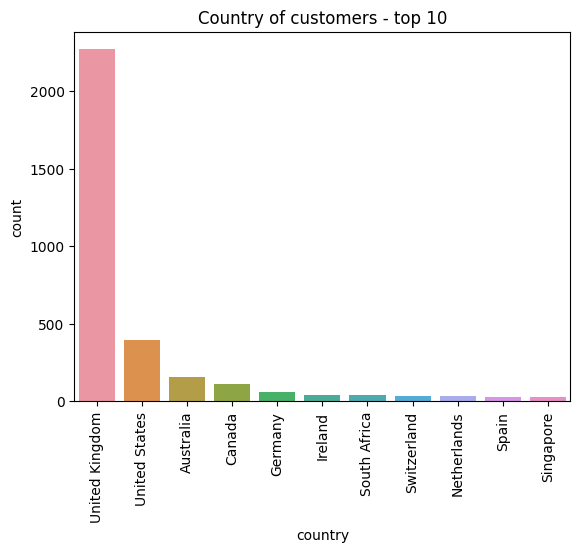

In [63]:
country_count = reviews_df.groupby('country').agg({'title':'count'}).rename(columns={'title':'count'}).sort_values('count', ascending=False).reset_index()
country_count
sns.barplot(data=country_count[:11], x='country', y='count')
plt.xticks(rotation=90)
plt.title('Country of customers - top 10')
plt.show()

## Trip profile

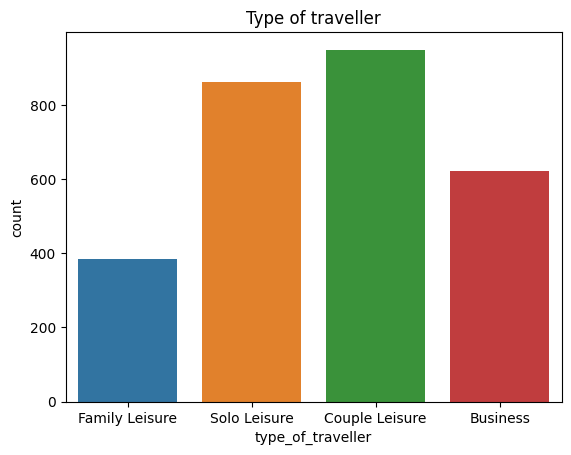

In [66]:
sns.countplot(data=reviews_df, x='type_of_traveller')
plt.title('Type of traveller')
plt.show()

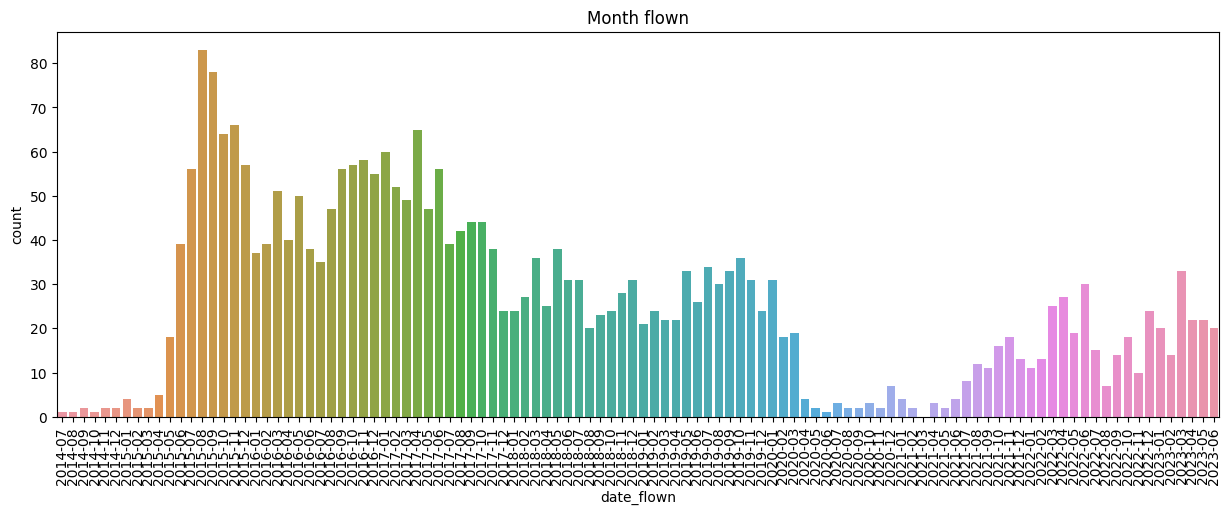

In [178]:
date_flown_df = reviews_df.groupby('date_flown').agg({'title':'count'}).rename(columns={'title':'count'}).reset_index()
date_flown_df.date_flown = date_flown_df.date_flown.dt.strftime('%Y-%m')
months = pd.date_range(start='2014-07-01', end='2023-06-30', freq='MS').strftime('%Y-%m')
zeros = pd.DataFrame({month:0 for month in months if month not in list(date_flown_df.date_flown)}, index=[0]).T.reset_index().rename(columns={0:'count', 'index':'date_flown'})
date_flown_df = pd.concat((date_flown_df, zeros), axis=0).sort_values('date_flown')

sns.barplot(data=date_flown_df, x='date_flown', y='count')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Month flown')
plt.show()

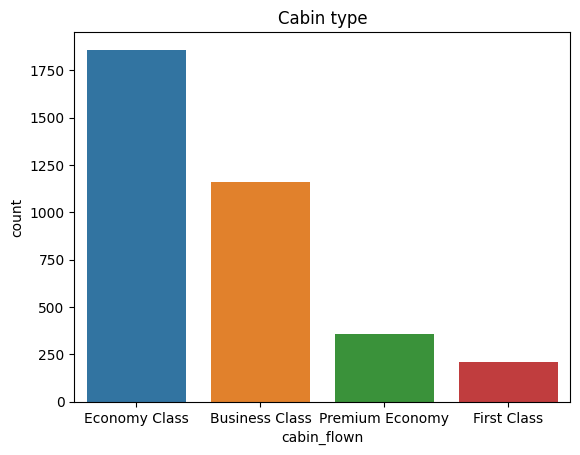

In [98]:
sns.countplot(data=reviews_df, x='cabin_flown')
plt.title('Cabin type')
plt.show()

## Review profile

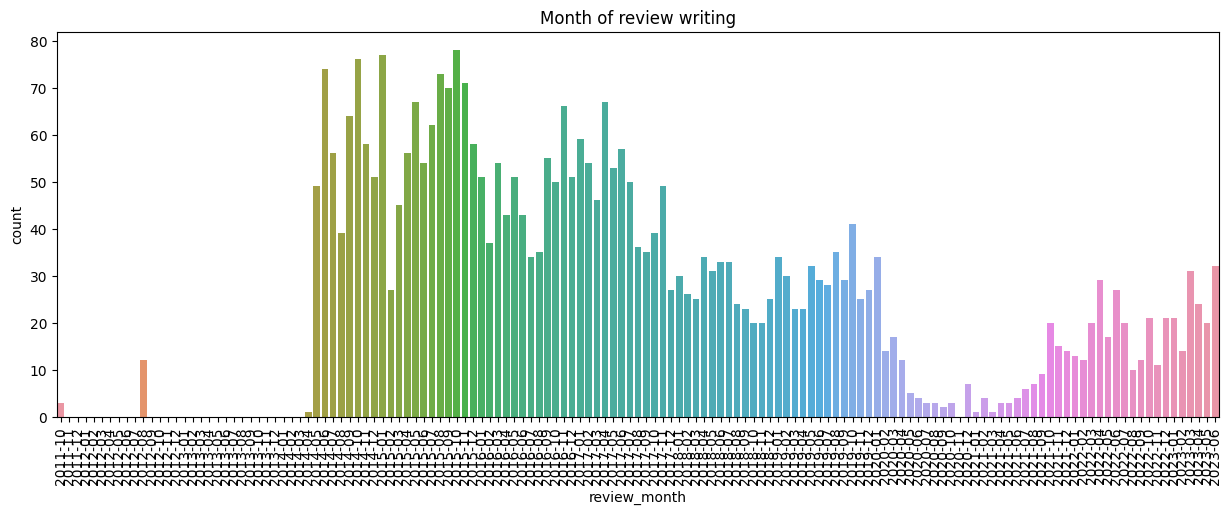

In [173]:
review_time_df = reviews_df.copy().sort_values('time')
review_time_df['review_month'] = review_time_df.time.dt.strftime('%Y-%m')
review_time_df = review_time_df.groupby('review_month').agg({'title':'count'}).rename(columns={'title':'count'}).reset_index().sort_values('review_month')
months = pd.date_range(start='2011-10-01', end='2023-06-30', freq='MS').strftime('%Y-%m')
zeros = pd.DataFrame({month:0 for month in months if month not in list(review_time_df.review_month)}, index=[0]).T.reset_index().rename(columns={0:'count', 'index':'review_month'})
review_time_df = pd.concat((review_time_df, zeros), axis=0).sort_values('review_month')

sns.barplot(data=review_time_df, x='review_month', y='count')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Month of review writing')
plt.show()

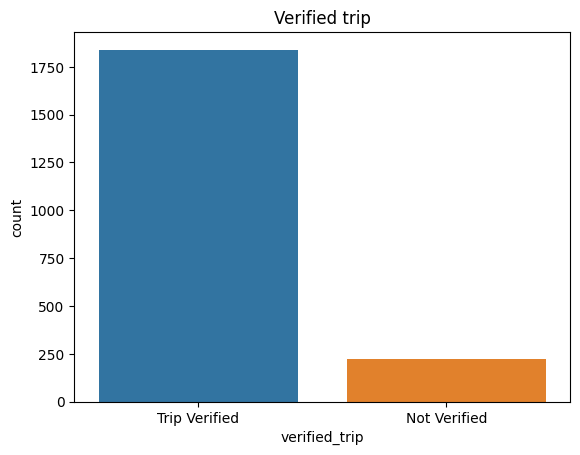

In [252]:
sns.countplot(data=reviews_df, x='verified_trip')
plt.title('Verified trip')
plt.show()

## Distribution of review scores

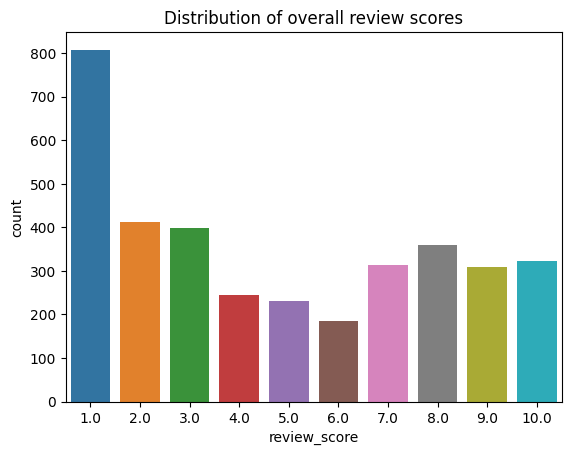

In [ ]:
sns.countplot(data=reviews_df.sort_values('review_score'), x='review_score')
plt.title('Distribution of overall review scores')
plt.show()

In [179]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   3589 non-null   object        
 1   country                 3587 non-null   object        
 2   time                    3589 non-null   datetime64[ns]
 3   verified_trip           2064 non-null   object        
 4   review_text             3589 non-null   object        
 5   type_of_traveller       2819 non-null   object        
 6   cabin_flown             3587 non-null   object        
 7   route                   2814 non-null   object        
 8   date_flown              2811 non-null   datetime64[ns]
 9   seat_comfort            3483 non-null   float16       
 10  cabin_staff_service     3473 non-null   float16       
 11  food_and_beverages      3231 non-null   float16       
 12  ground_service          2748 non-null   float16 

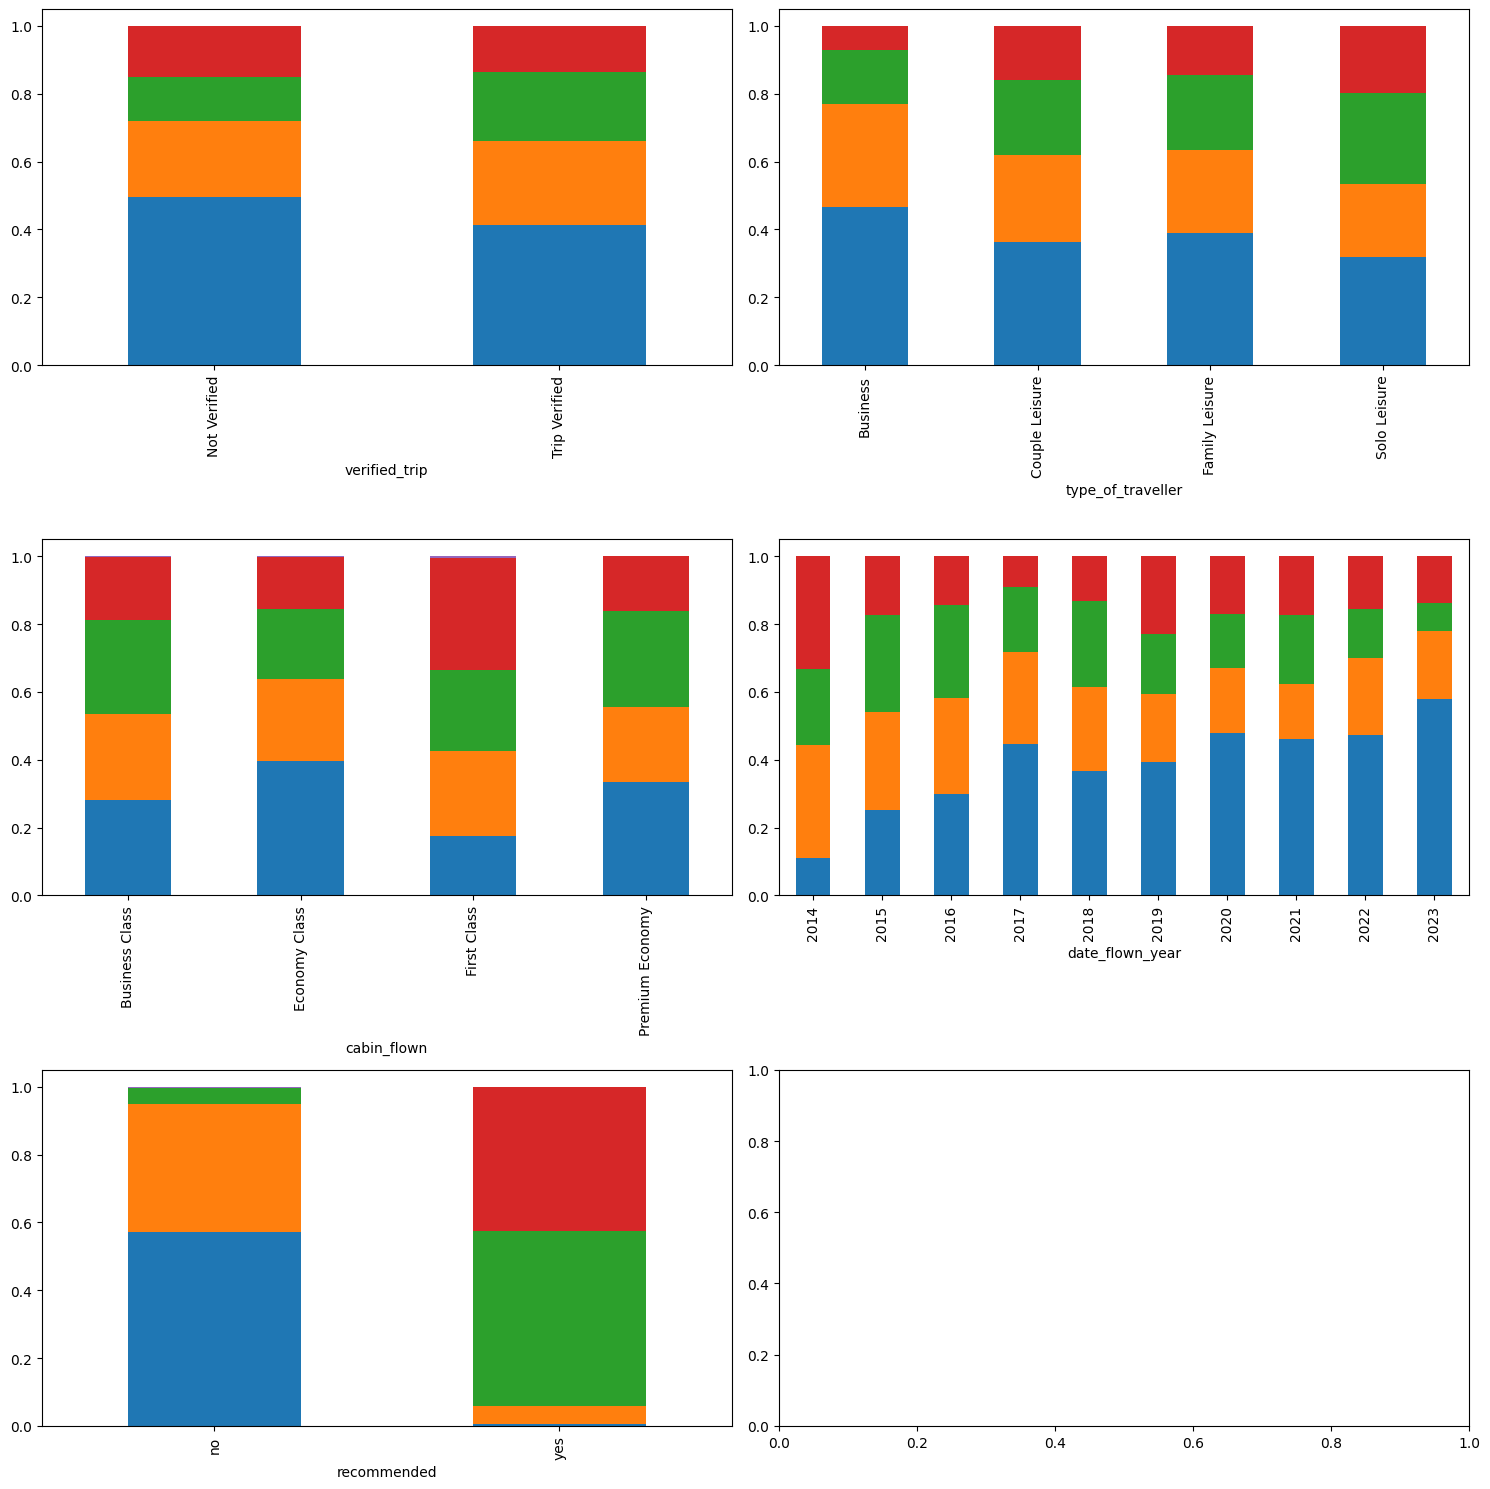

In [256]:
reviews_df['date_flown_year'] = reviews_df.date_flown.dt.strftime('%Y')
reviews_df['review_score_cat'] = np.where(
    reviews_df.review_score<=2, '1-2', np.where(
        reviews_df.review_score<=5, '3-5', np.where(
            reviews_df.review_score<=8, '6-8', np.where(
                reviews_df.review_score>=9, '9-10', 'na'
            )
        )
    )
)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

cols = ['verified_trip', 'type_of_traveller', 'cabin_flown', 'date_flown_year', 'recommended']

for i, col in enumerate(cols):
    df_ = reviews_df.groupby([col, 'review_score_cat']).agg({'title':'count'}).unstack('review_score_cat')
    sum_ = df_.sum(axis=1)
    for col in df_.columns:
        df_.loc[:, col] = df_.loc[:, col] / sum_
    df_.plot(kind='bar', stacked=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].get_legend().remove()

fig.tight_layout()

In [254]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   3589 non-null   object        
 1   country                 3587 non-null   object        
 2   time                    3589 non-null   datetime64[ns]
 3   verified_trip           2064 non-null   object        
 4   review_text             3589 non-null   object        
 5   type_of_traveller       2819 non-null   object        
 6   cabin_flown             3587 non-null   object        
 7   route                   2814 non-null   object        
 8   date_flown              2811 non-null   datetime64[ns]
 9   seat_comfort            3483 non-null   float16       
 10  cabin_staff_service     3473 non-null   float16       
 11  food_and_beverages      3231 non-null   float16       
 12  ground_service          2748 non-null   float16 

## Correlation between review categories and overall review score

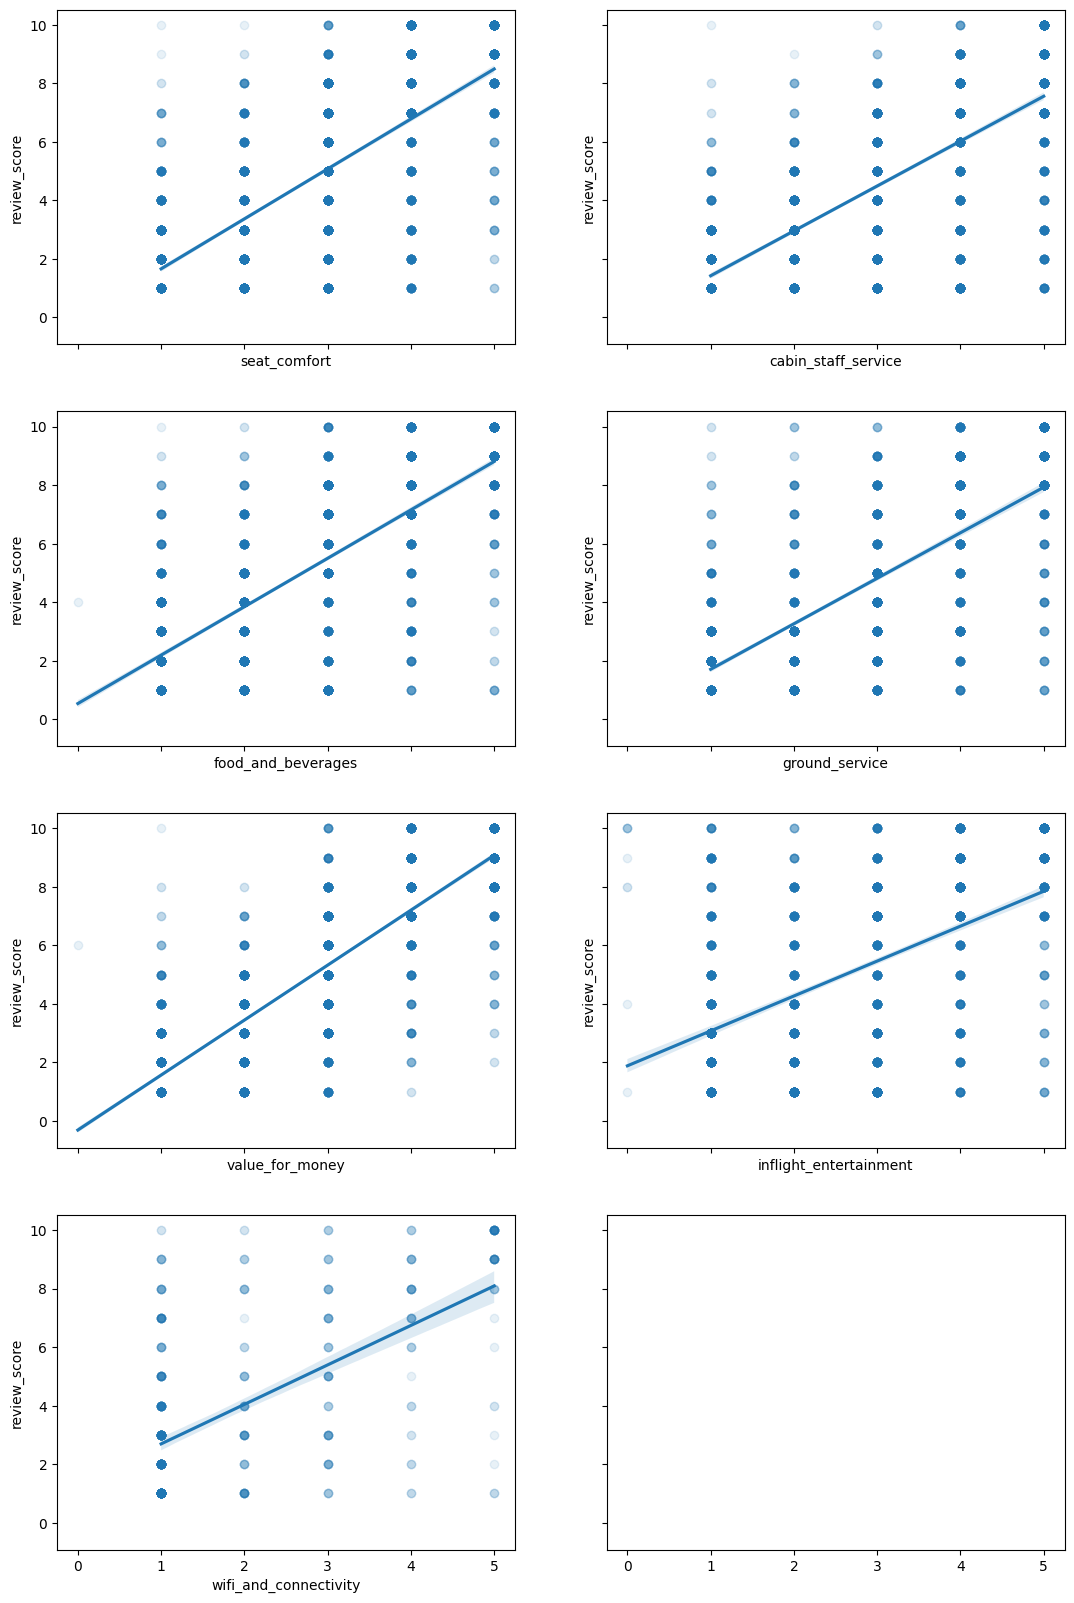

In [260]:
cols = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money', 
        'inflight_entertainment', 'wifi_and_connectivity']

fig, axs = plt.subplots(4, 2, figsize=(13, 20), sharex=True, sharey=True)

for i, col in enumerate(cols):
    sns.regplot(
        data=reviews_df, x=f'{col}', y='review_score', ax=axs[i//2, i%2], 
        scatter_kws={'alpha':.1})